# Introduction 

* the linear least squares problem
    + overdetermined
    + underdetermined 

Application:

* curve fitting
* statistical modeling of noisy data
* geodetic modeling (大地测量建模)

Methods:
* the normal equations
* the QR decomposition
* SVD
    + frequently use
    + properies
    
* 3.3 perturbation theory
* 3.4 implementation datails and roundoff analysis
* 3.5 ill-conditioned situation 
* 3.7 other kind LSP

**Example 3.1**: curving fitting

```
numpy.polyfit(x, y, deg)
>>> x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
>>> y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
>>> z = np.polyfit(x, y, 3)
>>> z
array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])
```
* show the coding process
* plot the figure
* analysis the result 
* basis $1, x, x^2, \cdots, x^k$ 

[ -1.01777459e-21  -2.26522369e-22   1.03036115e-18   2.07459123e-20
  -7.17721512e-16  -7.74095477e-19   3.81987402e-13   1.52078257e-17
  -1.50946332e-10  -1.69718770e-16   4.20586933e-08   1.08182677e-15
  -7.67058597e-06  -3.74927103e-15   8.16052493e-04   6.22029460e-15
  -4.13417022e-02  -3.60472256e-15   8.28318531e-01   9.25990014e-17]
2
4
7
20
31


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


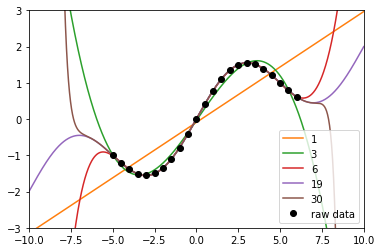

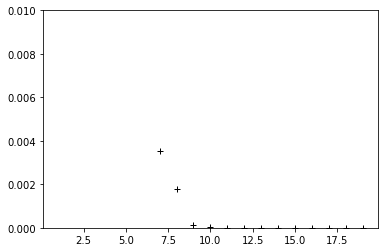

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda y: np.sin(np.pi*y/5) + y/5
y = np.linspace(-5, 6, num=23)
b = f(y)
deg = [1, 3, 6, 19, 30]
p =[]
for d in deg:
    p.append(np.polyfit(y, b, d))
print(p[3])

fig = plt.figure()
axes = fig.gca()
# plot the true function
y1 = np.linspace(-5, 6, num=1000)
axes.set_xlim((-10, 10))
axes.set_ylim((-3, 3))
axes.set_aspect('auto')
axes.plot(y1, f(y1))

# plot the fit polynomial
y2 = np.linspace(-10, 10, num=1000)
for p0 in p:
    print(len(p0))
    b2 = np.polyval(p0, y2)
    axes.plot(y2, b2, label=str(len(p0)-1))
axes.plot(y, b,'ko',label='raw data')
axes.legend()


p = []
for d in range(1, 20):
    p.append(np.poly1d(np.polyfit(y, b, d)))
    
r = np.zeros((19,))
for i in range(0, 19):
    r[i] = np.linalg.norm(p[i](y) - b, 2)
fig1 = plt.figure()
axes1 = fig1.gca()
axes1.set_ylim((0, 0.01))
axes1.plot(range(1, 20), r, 'k+')

One can change to another kind of funcdtion as basis function.

$f_1(y), f_2(y), \cdot, f_k(y)$

**Example 3.2** Statistical modeling

* GPA
* SAT
    + verbal 
    + quantitative 

* linear regression
* maximum-likelihood estimate 
* covariance matrix 

**Example 3.3**

* Gauss invented least squares

* US National Geodetic Survey
* useful 
* big scale 
* computation by computer 1978

The formulation of this problem. 
* nonlinear 
* approcimaing by many LSPs
* details
    + points: latitude, longitude and elevation 
    + distance 
    + angle
    + linearize
* aim is to estimate the corrections